# BANK CHURN PROJECT
Hello I am Snigdha! In this project we have a bank customer churn dataset for predicting whether a customer churns or not. The dataset is obtained from Kaggle.  

In this project I want to analyse the data to draw business insights using data preprocessing,EDA, Feature Importance, Predictive Modelling 

## IMPORT LIBRARIES

In [5]:
!pip install -U xgboost

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import joblib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## II. IMPORT THE DATASET
The dataset is imported and checked to find the number of columns and their names

In [107]:
df=pd.read_csv("C:\\Users\\Snigdha\\OneDrive\\Desktop\\datasets_for_projects\\Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [108]:
# Display the names of variables in the dataset
col=df.columns
col

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [109]:
# Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [110]:
df.shape

(10002, 14)

Based on the above summary the data has 14 variables with 10002 observations in each variable.  
The variables are as follows:  
CustomerID: A unique identifier for each customer  
Surname: The customer's surname or last name  
CreditScore: A numerical value representing the customer's credit score  
Geography: The country where the customer resides (France, Spain or Germany)  
Gender: The customer's gender (Male or Female)  
Age: The customer's age.  
Tenure: The number of years the customer has been with the bank  
Balance: The customer's account balance  
NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)  
HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)  
IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)  
EstimatedSalary: The estimated salary of the customer  
Exited: Whether the customer has churned (1 = yes, 0 = no)

## III. DATA PREPARATION  
#### 1. Finding unique values of the variables

In [111]:
df["CreditScore"].value_counts(normalize=True).round(4).sort_index() * 100

CreditScore
350    0.05
351    0.01
358    0.01
359    0.01
363    0.01
       ... 
846    0.05
847    0.06
848    0.05
849    0.08
850    2.33
Name: proportion, Length: 460, dtype: float64

In [112]:
df["Geography"].value_counts(normalize=True).round(4).sort_index() * 100

Geography
France     50.13
Germany    25.10
Spain      24.77
Name: proportion, dtype: float64

In [113]:
df["Gender"].value_counts(normalize=True).round(4).sort_index() * 100

Gender
Female    45.43
Male      54.57
Name: proportion, dtype: float64

In [114]:
df["Age"].value_counts(normalize=True).round(4).sort_index() * 100

Age
18.0    0.22
19.0    0.27
20.0    0.40
21.0    0.53
22.0    0.84
        ... 
83.0    0.01
84.0    0.02
85.0    0.01
88.0    0.01
92.0    0.02
Name: proportion, Length: 73, dtype: float64

In [15]:
df["Tenure"].value_counts(normalize=True).round(4).sort_index() * 100

Tenure
0      4.13
1     10.35
2     10.48
3     10.10
4      9.90
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90
Name: proportion, dtype: float64

In [16]:
df["Balance"].value_counts(normalize=True).round(4).sort_index() * 100

Balance
0.00         36.16
3768.69       0.01
12459.19      0.01
14262.80      0.01
16893.59      0.01
             ...  
216109.88     0.01
221532.80     0.01
222267.63     0.01
238387.56     0.01
250898.09     0.01
Name: proportion, Length: 6382, dtype: float64

In [17]:
df["NumOfProducts"].value_counts(normalize=True).round(4).sort_index() * 100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

In [18]:
df["HasCrCard"].value_counts(normalize=True).round(4).sort_index() * 100

HasCrCard
0.0    29.45
1.0    70.55
Name: proportion, dtype: float64

In [19]:
df["IsActiveMember"].value_counts(normalize=True).round(4).sort_index() * 100

IsActiveMember
0.0    48.51
1.0    51.49
Name: proportion, dtype: float64

In [20]:
df["EstimatedSalary"].value_counts(normalize=True).round(4).sort_index() * 100

EstimatedSalary
11.58        0.01
90.07        0.01
91.75        0.01
96.27        0.01
106.67       0.01
             ... 
199909.32    0.01
199929.17    0.01
199953.33    0.01
199970.74    0.01
199992.48    0.01
Name: proportion, Length: 9999, dtype: float64

In [21]:
df["Exited"].value_counts(normalize=True).round(4).sort_index() * 100

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### 2. Dropping duplicate values 

In [100]:
df2=df.copy()
df_cln = df.drop_duplicates(subset=["CustomerId"], keep="first")

In [101]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        9999 non-null   object  
 5   Gender           10000 non-null  object  
 6   Age              9999 non-null   float64 
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        9999 non-null   float64 
 11  IsActiveMember   9999 non-null   float64 
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
 14  AgeGroup         9999 non-null   category
dtypes: category(1), float64(5), int64(6), object(3)
memory usage: 1.2+ MB


#### 3.Removing null values

In [102]:
# Find the rows with missing values
df_cln[df_cln.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0,40-50
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0,40-50
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0,40-50
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0,NaN


We see that there are 4 null values:  
1. In row4 'HasCrCard' value is missing
2. In row 6 'Geography' value is missing
3. In row 8 'IsActiveMember' value is missing
4. In row 9 'Age' is missing
   
We remove the null values in all the columns with categorical missing values and replace the missing 'Age' value with its median

In [115]:
# Drop the rows which has missing categorical variables values
df_cln.dropna(subset=["HasCrCard", "Geography", "IsActiveMember"], inplace=True)
# Replace the missing value in the 'Age' column with its median value
df_cln["Age"].fillna(df_cln["Age"].median(), inplace=True)

C:\Users\Snigdha\AppData\Local\Temp\ipykernel_9424\2778454952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln.dropna(subset=["HasCrCard", "Geography", "IsActiveMember"], inplace=True)
C:\Users\Snigdha\AppData\Local\Temp\ipykernel_9424\2778454952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cln["Age"].fillna(df_cln["Age"].m

In [27]:
# We find the summary to ensure that there are no more null values
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9997 non-null   int64  
 1   CustomerId       9997 non-null   int64  
 2   Surname          9997 non-null   object 
 3   CreditScore      9997 non-null   int64  
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           9997 non-null   int64  
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   float64
 11  IsActiveMember   9997 non-null   float64
 12  EstimatedSalary  9997 non-null   float64
 13  Exited           9997 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


#### 4. Converting Datatypes 
The datatype of variables "HasCrCard" and "IsActiveMember" is changed from float to integer

In [28]:
df_cln.loc[:,["HasCrCard","IsActiveMember"]] = df_cln[["HasCrCard","IsActiveMember"]].astype(int)
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9997 non-null   int64  
 1   CustomerId       9997 non-null   int64  
 2   Surname          9997 non-null   object 
 3   CreditScore      9997 non-null   int64  
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           9997 non-null   int64  
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   float64
 11  IsActiveMember   9997 non-null   float64
 12  EstimatedSalary  9997 non-null   float64
 13  Exited           9997 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


#### 5. Dropping Columns with no analytical significance

In [29]:
# As the 'RowNumber','CustomerId' and 'Surname' have no use in analysis of data to find whether a customer has churned or not
df_cln.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

C:\Users\Snigdha\AppData\Local\Temp\ipykernel_9424\2816495719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [30]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9997 non-null   int64  
 1   Geography        9997 non-null   object 
 2   Gender           9997 non-null   object 
 3   Age              9997 non-null   float64
 4   Tenure           9997 non-null   int64  
 5   Balance          9997 non-null   float64
 6   NumOfProducts    9997 non-null   int64  
 7   HasCrCard        9997 non-null   float64
 8   IsActiveMember   9997 non-null   float64
 9   EstimatedSalary  9997 non-null   float64
 10  Exited           9997 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.2+ KB


#### 6. Finding Distribution of numerical variables in the dataset

In [134]:
# We separate the features/variables ithe dataset into two types numerical or categorical
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

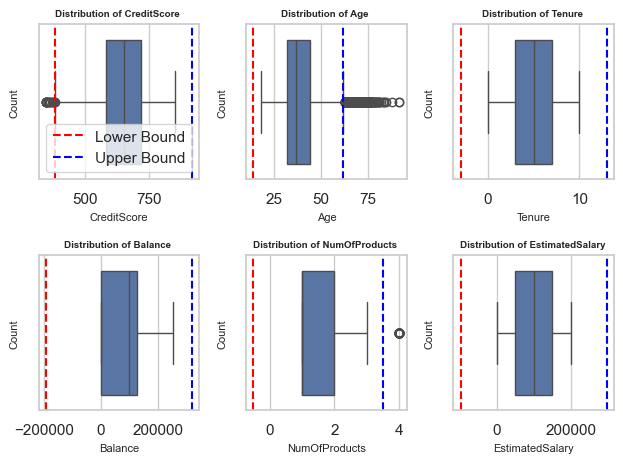

In [136]:
for i, col in enumerate(numerical_features):
    ax = plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_cln, x=col, ax=ax)

    # Calculate IQR for outlier thresholds
    Q1 = df_cln[col].quantile(0.25)
    Q3 = df_cln[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add vertical lines for outlier thresholds on the boxplot visualization
    ax.axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
    ax.axvline(upper_bound, color="blue", linestyle="--", label="Upper Bound")   
    
    ax.set_title(f"Distribution of {col} ", fontsize=7, fontweight="bold")
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel("Count", fontsize=8)  

    # Add legend only to first plot to avoid repetition
    if i == 0:
        ax.legend(fontsize=11)

plt.tight_layout()
plt.show()


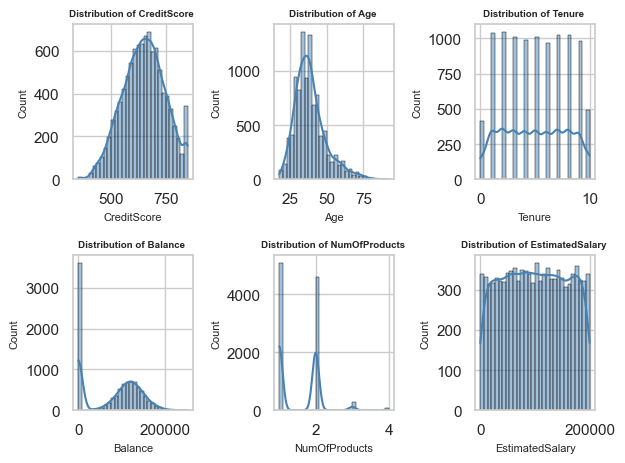

In [137]:
for i, col in enumerate(numerical_features):
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(data=df_cln, x=col, kde=True, bins=30, ax=ax, color='steelblue', edgecolor='black')
    # Calculate IQR for outlier thresholds
    Q1 = df_cln[col].quantile(0.25)
    Q3 = df_cln[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    
    ax.set_title(f"Distribution of {col} ", fontsize=7, fontweight="bold")
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel("Count", fontsize=8)  

plt.tight_layout()
plt.show()


We see that the numerical variables 'Age','CreditScore' and 'NumOfProducts' have outliers.  
We can see that 'Age' has maximum number of outliers in the dataset.

#### 7. Removing Outliers

In [138]:
# Calculating IQR and find those data of 'Age' column that are outliers
Q3=df_cln['Age'].quantile(0.75)
Q1=df_cln['Age'].quantile(0.25)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
age_outlier=df_cln[(df_cln['Age']>UB)|(df_cln['Age']<LB)]
age_outlier['Age'].value_counts().sort_index()  # arranging the oulier data in ascending order

Age
63.0    40
64.0    37
65.0    18
66.0    35
67.0    37
68.0    19
69.0    22
70.0    18
71.0    27
72.0    21
73.0    13
74.0    18
75.0     9
76.0    11
77.0    10
78.0     5
79.0     4
80.0     3
81.0     4
82.0     1
83.0     1
84.0     2
85.0     1
88.0     1
92.0     2
Name: count, dtype: int64

In [139]:
age_outlier

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
58,59,15623944,T'ien,511,Spain,Female,66.0,4,0.00,1,1.0,0.0,1643.11,1,>60
85,86,15805254,Ndukaku,652,Spain,Female,75.0,10,0.00,2,1.0,1.0,114675.75,0,>60
104,105,15804919,Dunbabin,670,Spain,Female,65.0,1,0.00,1,1.0,1.0,177655.68,1,>60
158,159,15589975,Maclean,646,France,Female,73.0,6,97259.25,1,0.0,1.0,104719.66,0,>60
181,182,15789669,Hsia,510,France,Male,65.0,2,0.00,2,1.0,1.0,48071.61,0,>60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68.0,7,153545.11,1,1.0,1.0,186574.68,0,>60
9765,9766,15777067,Thomas,445,France,Male,64.0,2,136770.67,1,0.0,1.0,43678.06,0,>60
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64.0,2,105736.32,1,1.0,1.0,89935.73,1,>60
9894,9895,15704795,Vagin,521,France,Female,77.0,6,0.00,2,1.0,1.0,49054.10,0,>60


We filter our dataset by removing those customers in the dataset whose age lie beyond 80 years 

In [142]:
df_filt = df_cln[df_cln["Age"] <= 80]
df_filt.info()
df_filt.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        9985 non-null   int64   
 1   CustomerId       9985 non-null   int64   
 2   Surname          9985 non-null   object  
 3   CreditScore      9985 non-null   int64   
 4   Geography        9985 non-null   object  
 5   Gender           9985 non-null   object  
 6   Age              9985 non-null   float64 
 7   Tenure           9985 non-null   int64   
 8   Balance          9985 non-null   float64 
 9   NumOfProducts    9985 non-null   int64   
 10  HasCrCard        9985 non-null   float64 
 11  IsActiveMember   9985 non-null   float64 
 12  EstimatedSalary  9985 non-null   float64 
 13  Exited           9985 non-null   int64   
 14  AgeGroup         9984 non-null   category
dtypes: category(1), float64(5), int64(6), object(3)
memory usage: 1.2+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9985.000000,9.985000e+03,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000
mean,5001.481022,1.569090e+07,650.469805,38.866102,5.012419,76506.583869,1.530095,0.705558,0.514472,100096.309894,0.203906
std,2886.230533,7.191112e+04,96.569531,10.373537,2.892098,62398.696350,0.581775,0.455814,0.499816,57505.798828,0.402920
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2502.000000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51011.290000,0.000000
50%,5002.000000,1.569073e+07,652.000000,37.000000,5.000000,97234.580000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,7500.000000,1.575317e+07,717.000000,44.000000,7.000000,127660.460000,2.000000,1.000000,1.000000,149384.430000,0.000000
max,10000.000000,1.581569e+07,850.000000,80.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### 8. Encoding of Categorical variable

In [42]:
#Encoding the categorical features
df_encoded = pd.get_dummies(df_filt, columns=["Geography", "Gender"], drop_first=True)

In [43]:
# Standardising the numerical variables
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.325893,0.302120,-1.041656,-1.226154,-0.911214,1.0,1.0,0.021783,1,False,False,False
1,-0.439807,0.205716,-1.387443,0.117016,-0.911214,0.0,1.0,0.216446,0,False,True,False
2,-1.537516,0.302120,1.033067,1.332694,2.526713,1.0,0.0,0.240601,1,False,False,False
3,0.502567,0.012908,-1.387443,-1.226154,0.807749,0.0,0.0,-0.109032,0,False,False,False
5,-0.056644,0.494928,1.033067,0.596985,0.807749,1.0,0.0,0.863615,1,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.248181,0.012908,-0.004294,-1.226154,0.807749,1.0,0.0,-0.066530,0,False,False,True
9996,-1.392536,-0.372708,1.724641,-0.306704,-0.911214,1.0,1.0,0.027885,0,False,False,True
9997,0.606124,-0.276304,0.687280,-1.226154,-0.911214,0.0,1.0,-1.008831,1,False,False,False
9998,1.258537,0.302120,-0.695868,-0.022939,0.807749,1.0,0.0,-0.125347,1,True,False,True


#### 9. Checking Multicollinearity
We have to see whether there is any relationship between the dependent variables , i.e. , whether multicollinearity exists or not.  
For this, we calculate the Variance Inflation Factor (VIF). If VIF>5 then we can se multicollinearity exists and remove those variables with VIF >5.

In [75]:
df_encoded2=df_encoded.astype(int)
# Select only the feature columns (excluding the target)
X = df_encoded2.drop(columns=['Exited'])  # replace with your actual features

# Add a constant term (required for VIF calculation)
X = add_constant(X)

# Calculate VIF
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: VIF = {variance_inflation_factor(X.values, i):.2f}")


const: VIF = 6.96
CreditScore: VIF = 1.00
Age: VIF = 1.02
Tenure: VIF = 1.00
Balance: VIF = 1.14
NumOfProducts: VIF = 1.01
HasCrCard: VIF = 1.00
IsActiveMember: VIF = 1.02
EstimatedSalary: VIF = 1.00
Geography_Germany: VIF = 1.27
Geography_Spain: VIF = 1.12
Gender_Male: VIF = 1.00


We see that all the VIFs are less than 5  
##### Multicollinearity does not exist

## IV. EXPLORATORY DATA ANALYSIS
#### Customer Distribution with Age and Gender

In [148]:
#Taking those observations in the dataset who have churned
df_exited=df_cln[df_cln['Exited']==1]
#Obtaining proportion of churned customers based on gender and geography
combo_counts=(df_exited[['Geography','Gender']].value_counts(normalize=True)*100).reset_index(name="Percentage")
combo_counts

,Geography,Gender,Percentage
0,France,Female,22.582229
1,Germany,Female,21.993127
2,Germany,Male,17.967599
3,France,Male,17.182131
4,Spain,Female,11.340206
5,Spain,Male,8.934708


In [149]:
pivot_df = combo_counts.pivot(index="Geography", columns="Gender", values="Percentage").fillna(0)
pivot_df

Gender,Female,Male
Geography,,
France,22.582229,17.182131
Germany,21.993127,17.967599
Spain,11.340206,8.934708


From the above table wew see that the maximum numbeer of churned customers belong from France followed by Germany  
In France 22.58% females have churned and 17.18% males have churned  
In Germany 21.99% females have churned and 17.97% males have churned  
In Spain 11.34% females have churned and 8.93% males have churned  


Text(0, 0.5, 'counts')

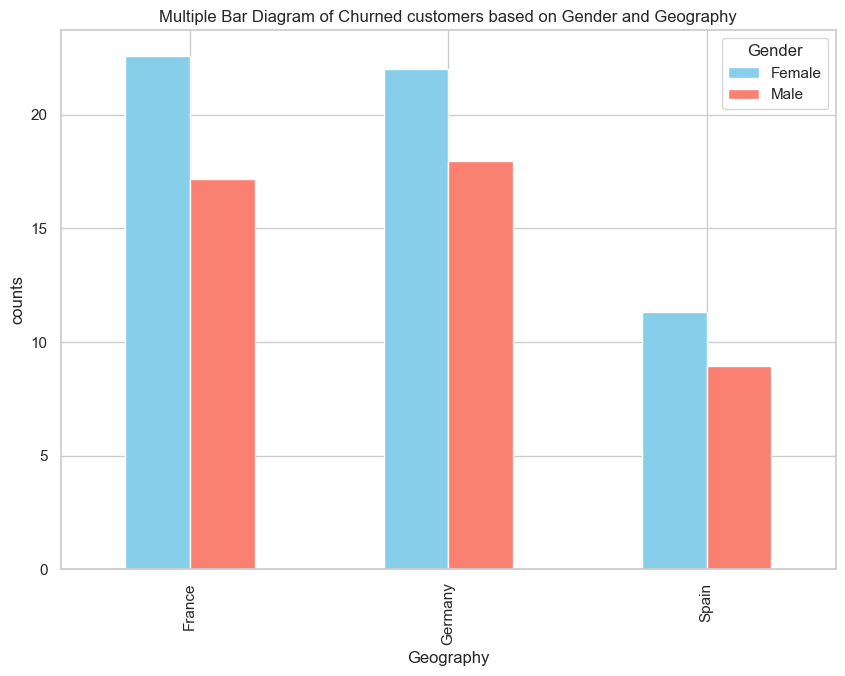

In [150]:
#Plotting multiple bar diagram
pivot_df.plot(kind="bar", figsize=(10, 7), color=["skyblue", "salmon"])
plt.title("Multiple Bar Diagram of Churned customers based on Gender and Geography")
plt.ylabel("counts")


We see that the churned customers mostly belong from France and Germany  
Also females customers are at a higher risk of churning overall  

The male customers in Spain have alower risk of churning

#### Customer Distribution with Age

C:\Users\Snigdha\AppData\Local\Temp\ipykernel_9424\4192020785.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_exited = df2.groupby(['AgeGroup', 'Exited']).size().unstack(fill_value=0)


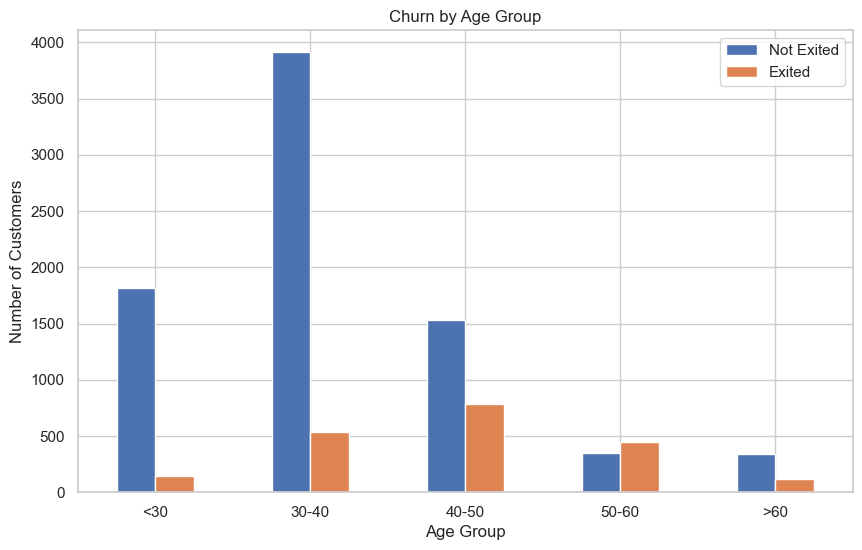

In [151]:
df2=df_encoded.copy()

# Divide tha 'Age' variable into different groups
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '>60']
df2['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

#Counting the no of customers based on their Age group and whether he/she has churned or not
age_exited = df2.groupby(['AgeGroup', 'Exited']).size().unstack(fill_value=0)

#Plotting 
age_exited.plot(kind='bar', figsize=(10,6))
plt.title("Churn by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
plt.show()

We see that the bank has maximum no of customers in the Age Group of 30 to 40  
Till age 40 the churn rate among customers is very low if we compare the churned and not churned customers in that age group.  
In age group 40 -50 , the churn rate increases as compared that in younger customers  
In age group 50 -60 the no of churned customers exceeds the retained customers.

#### Customer Distribution with NumOfProducts

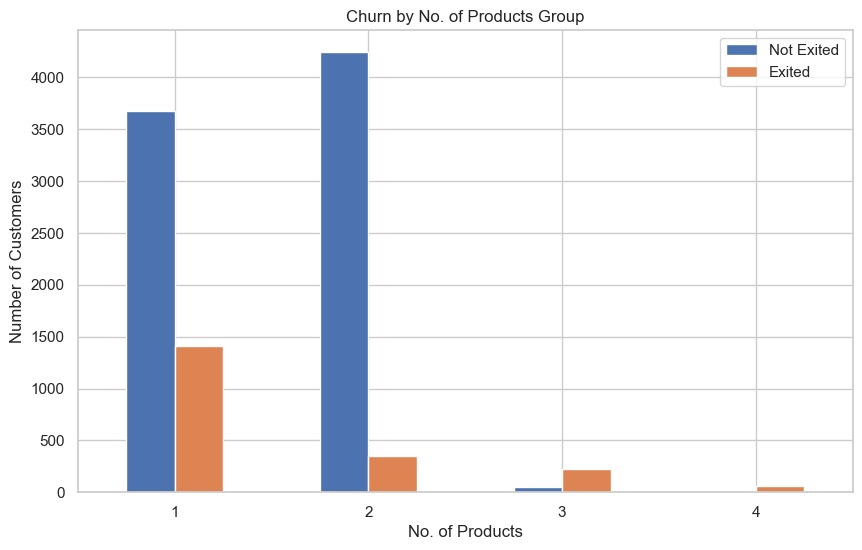

In [157]:
nop_exited = df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)
nop_exited.plot(kind='bar', figsize=(10,6))
plt.title("Churn by No. of Products Group")
plt.xlabel("No. of Products")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
plt.show()

We see that the customers having 2 products with the bank has a lower rate of churning  
Whereas as the no of products increases the churn risk of customers increases

#### Customer Distribution with IsActiveMember

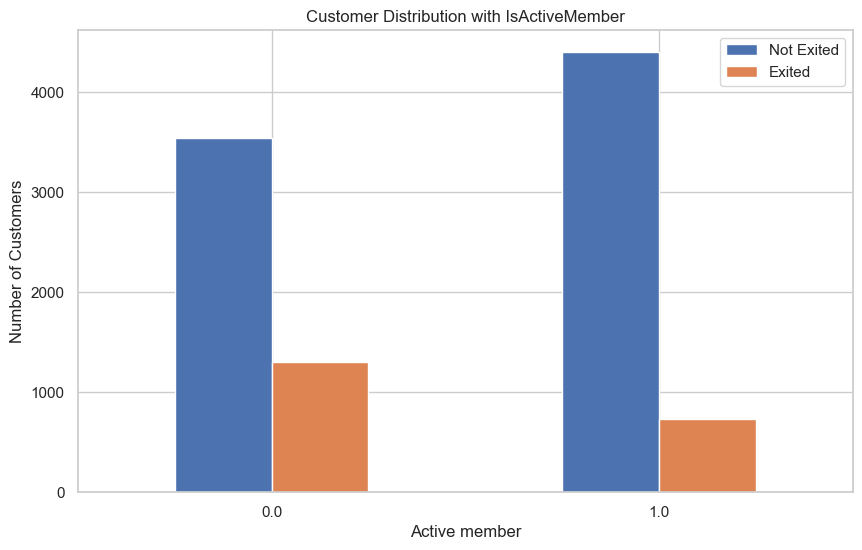

In [158]:
age_exited = df2.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)
age_exited.plot(kind='bar', figsize=(10,6))
plt.title("Customer Distribution with IsActiveMember")
plt.xlabel("Active member")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
plt.show()

We see that no of active members is greater than that of inactive members in the bank  
Also the churn risk is higher among the inactive members

#### Customer Distribution with BalanceGroup

C:\Users\Snigdha\AppData\Local\Temp\ipykernel_9424\6584296.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bal_exited=df3.groupby(['BalanceGroup','Exited']).size().unstack(fill_value=0)


Text(0, 0.5, 'Count')

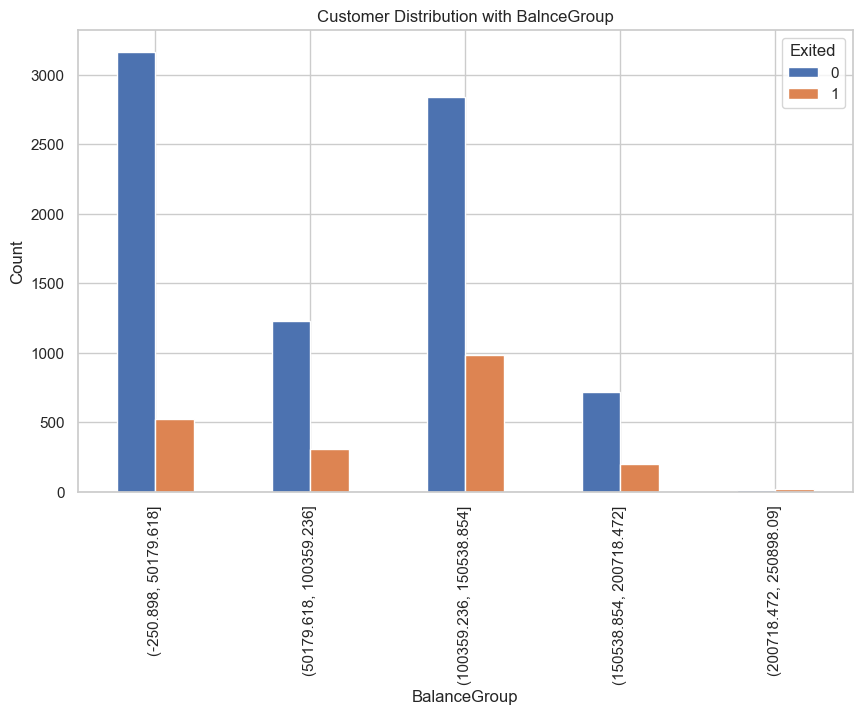

In [161]:
df3=df_cln.copy()
df_cln.head(5)
df3['BalanceGroup'] = pd.cut(df3['Balance'], bins=5)
bal_exited=df3.groupby(['BalanceGroup','Exited']).size().unstack(fill_value=0)
bal_exited.plot(kind='bar',figsize=(10,6))
plt.title('Customer Distribution with BalnceGroup')
plt.ylabel("Count")

We see that as the balance of the customers increases the customers' churn rate increases

In [155]:
df_cln.groupby('Exited')[['Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary']].mean()

,Balance,Tenure,NumOfProducts,EstimatedSalary
Exited,,,,
0,72739.100045,5.033543,1.544221,99755.367623
1,91108.539337,4.932744,1.475209,101465.677531


We obseve that high- balance customers having lower no of products and higher salaries are churning more  

## V. MODELLING
The independent variable is 'Exited'(y)

In [177]:
# Separating the variables into independent variables (x) and dependent variable(y)
x = df_encoded.drop("Exited", axis=1)
y = df_encoded["Exited"]

#Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=23, stratify=y)

#Training the model with XGBoost 
model1=XGBClassifier(random_state=23)
model1.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [180]:
#Rviewing the efficiency of model with accuracy, precision, recall and 
y_pred=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1506   84]
 [ 200  207]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1590
           1       0.71      0.51      0.59       407

    accuracy                           0.86      1997
   macro avg       0.80      0.73      0.75      1997
weighted avg       0.85      0.86      0.85      1997



#### EVALUATION RESULT OF BASELINE XGBOOST MODEL
Based on the Confusion Matrix and Classification Report above, here are the results of Baseline XGBoost Model:

Confusion Matrix description,  

a. 1,506 customers did not churn and were correctly predicted as not churning  

b. 84 customers did not churn but were wrongly predicted as churning (False Positive).  

c. 200 customers did churn but were wrongly predicted as staying (False Negative).  

d. 207 customers did churn and were correctly predicted as churning.

Classification Report description for retained customers ('Exited'== 0), most of them got good scores.  
a. The overall model Accuracy is 0.86.  
    The model was able to correctly predict 86% of the total customers, whether they churn or not.  

b. Precision score = 0.88. The model was able to recognize staying customers and correctly predicted 88% of them. While the remaining 11% were misclassified and were actually churned.  

c. Recall score = 0.95. Out of all customers who actually stay, the model was able to correctly identify and label 95% of them.  

d. F1-score = 0.91.  

This means that the model has a high ability to recognize customers who stay with the bank.  

Classification Report description for churning customers ('Exited'== 1) that needs further handling,
a. Precision score = 0.71.

Out of all customers that the model predicted would churn, only 71% actually churned.

b. Recall score = 0.51.

Out of all customers who actually churned, the model was able to correctly identify and label 51% of them.

c. F1-score= 0.59.

This means that the model has a moderate ability to recognize customers who will churn.
A score of 0.59 suggests the model is still prone to mistakes. There is a significant room for improvement.  

Therefore, scores that I need to improve from the Baseline XGBoost Model are as following:  

Precision score for churned class = 71%.  
Recall sore for churned class = 51%.  
F1-score for churned class = 59%.

## VI. IMPROVEMENT OF XGBOOST MODEL
We perform hyperparameter tuning on the XGBoost Model. The new model will be caled Tuned XGBoost Model

In [162]:
#Defining parameter grid which includes learning rate,no. of trees, tree depth and sample proportion used
param_grid={"n_estimators":[100,200],"max_depth":[3,5,7,9],"learning_rate":[0.01,0.1,0.2],"subsample":[0.8,0.9,1.0],"colsample_bytree": [0.8, 1]}

In [48]:
#Among all the combinations of different parameter we find and choose the one that increases the precision, recall and F1 score for churned class
grid_search=GridSearchCV(estimator=model1,param_grid=param_grid,scoring="f1",cv=6,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 6 folds for each of 144 candidates, totalling 864 fits


C:\Users\Snigdha\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Snigdha\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9], 'n_estimators': [100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1', verbose=1)

In [49]:
#Choosing the best parameter combination
print("Best parameter:",grid_search.best_params_)

Best parameter: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}


In [50]:
best_model_tuned=grid_search.best_estimator_
y_pred=best_model_tuned.predict(x_test)

In [51]:
#Rviewing the efficiency of model with accuracy, precision, recall and f1 score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1528   62]
 [ 204  203]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1590
           1       0.77      0.50      0.60       407

    accuracy                           0.87      1997
   macro avg       0.82      0.73      0.76      1997
weighted avg       0.86      0.87      0.86      1997



#### EVALUATION RESULT OF TUNED XGBOOST MODEL   
The **Classification Report** after performing Hyperparameter Tuning **(Tuned XGBoost)** compared to the **XGBoost model** are as following,  
1. **Precision score for 'Exited'==1** has improved fairly from 71% to 77% **(better)**.
2.  **Recall score for 'Exited'==1** decreases slightly from from 51% to 50%. **(worse)**
3. **F1-score for 'Exited'==1** has improved a slightly from 59% to 60% **(better)**.
4. Overall **Accuracy score** managed to increase slightly from 86% to 87% **(better)**.
5. The rest of the score for 'Exited'==0 remained stagnant or showed improvement(by 1%). So it is better.
6. **Confusion Matrix Comparison** in **Tuned XGBoost** as compared to **XGBoost** model
   a. Tuned XGBoost has more True Negatives (1,528) and less False Positives (62) than the XGBoost model's True Negatives (1,506) and False Positives (84).
   b. Tuned XGBoost has more False Negatives (204) and less True Positives (203) than the XGBoost model's False Negatives (200) and True Positives (207).
**Conclusion**: While the model has become more confident and performed better in doing churn predictions (higher precision), its ability to detect churn cases **(Recall score)**  and **F1-score** needs improvement.
To address the score issues of Precision, Recall and F1, I'm going to try a combination of balancing using SMOTE technique and repeat GridSearchCV again with a focus on Recall optimization.

**SMOTE+TUNED XGBOOST MODEL**

In [52]:
smote=SMOTE(random_state=23)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
grid_search_smote=GridSearchCV(estimator=model1,param_grid=param_grid,scoring="recall",cv=6,verbose=1,n_jobs=-1)
grid_search_smote.fit(x_train_balanced, y_train_balanced)

Fitting 6 folds for each of 144 candidates, totalling 864 fits


C:\Users\Snigdha\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9], 'n_estimators': [100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='recall', verbose=1)

In [53]:
#Choosing the best parameter combination
print("Best parameter(Smote+tuned):",grid_search_smote.best_params_)
best_model_tuned_smote=grid_search.best_estimator_

Best parameter(Smote+tuned): {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}


In [54]:
#Rviewing the efficiency of model with accuracy, precision, recall and f1 score
y_pred_smote=best_model_tuned_smote.predict(x_test)
print(confusion_matrix(y_test,y_pred_smote))
print(classification_report(y_test,y_pred_smote))

[[1528   62]
 [ 204  203]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1590
           1       0.77      0.50      0.60       407

    accuracy                           0.87      1997
   macro avg       0.82      0.73      0.76      1997
weighted avg       0.86      0.87      0.86      1997



After applying SMOTE and tuning the XGBoost model, the evaluation metrics remained unchanged compared to the tuned model. This suggests that :

**The original model was already robust to class imbalance**

**Weighted XGBoost Model**

In [55]:
# Calculate scale_pos_weight as the ratio of majority class to minority class
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  # 0 for Not Churn / 1 for Churn
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 3.90


In [56]:
# Initialize the XGBoost model with the computed scale_pos_weight
best_model_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=23,
    scale_pos_weight=scale_pos_weight
)

# Train the model on the original (unbalanced) training set
best_model_weighted.fit(x_train, y_train)

C:\Users\Snigdha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
# Evaluate the model on the test set
y_pred_wt=best_model_weighted.predict(x_test)

# Print evaluation results
print(confusion_matrix(y_test,y_pred_wt))
print(classification_report(y_test,y_pred_wt))

[[1375  215]
 [ 146  261]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1590
           1       0.55      0.64      0.59       407

    accuracy                           0.82      1997
   macro avg       0.73      0.75      0.74      1997
weighted avg       0.83      0.82      0.82      1997



**EVALUATION RESULT AFTER TUNED XGBOOST WITH CLASS WEIGHTING (SCALE_POS_WEIGHT)**  

The Classification Report of the aftermath after using scale_pos_weight compared to the XGBoost model were as following,

A. For 'Exited'==0:

The Precision score remained high at 0.90 compared to 0.88 **(better)**.
The Recall score decreased from 0.95 to 0.86 **(worse)**.
The F1-score decreased slightly from 0.91 to 0.88 **(worse)**.  

B. For 'Exited'==1:

The Precision score decreased significantly from 0.71 to 0.55 **(worse)**.
The Recall score increased significantly from 0.51 to 0.64 **(better)**.
The F1-score dremained stagnant at 0.59.

C. As for the overall Accuracy stated on the Classification Report, the score decreased from 0.86 to 0.81 (worse).

Meanwhile the comparison of Confusion Matrix results compared to the XGBoost model are as following,

scale_post_weight has **less True Negatives**(1,375) and **more False Positives** (215) than Baseline XGBoost model's True Negatives (1,506) and False Positives (84).
scale_pos_weight has **less False Negatives** (146) and **more True Positives** (261) than Baseline XGBoost model's False Negatives (200) and True Positives (207).
  
  Conclusion:

The model trained with scale_pos_weight outperformed the Baseline XGBoost model, particularly in Recall score.
It achieved a higher Recall score and correctly identified more True Positives, meaning it was better at capturing actual churners.
This indicates that the scale_pos_weight model is more responsive in detecting customers who are likely to churn.
Although the Precision score decreased significantly, this condition is often acceptable in business context is where identifying as many potential churners as possible is more important than minimizing false alarms (wrong prediction).
Therefore, if the business goal is to reduce customer churn risk through targeted intervention, the model with class weighting (scale_pos_weight) is the more suitable choice, even if it comes at the cost of a few more false positives.

## VII. MODEL COMPARISON
We perform Logistic Regression, Random Forest, Decision Tree and SVM to compare with XGBoost Model

Logistic Regression  Model
[[1517   73]
 [ 323   84]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1590
           1       0.54      0.21      0.30       407

    accuracy                           0.80      1997
   macro avg       0.68      0.58      0.59      1997
weighted avg       0.77      0.80      0.76      1997



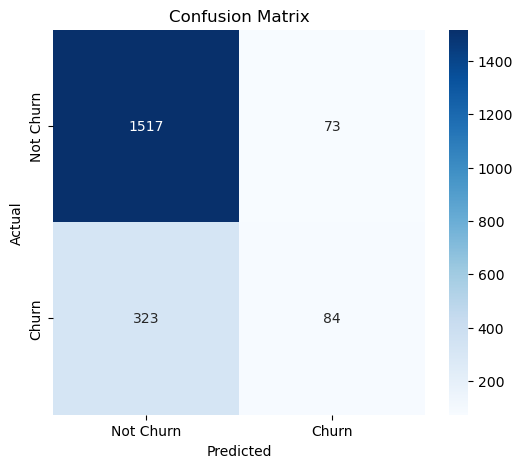

Random Forest  Model
[[1530   60]
 [ 220  187]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1590
           1       0.76      0.46      0.57       407

    accuracy                           0.86      1997
   macro avg       0.82      0.71      0.74      1997
weighted avg       0.85      0.86      0.85      1997



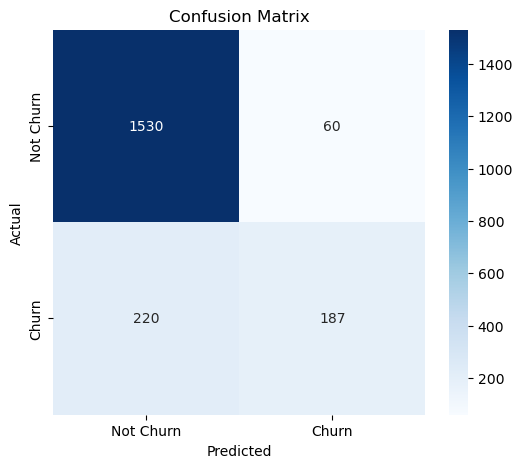

Decision Tree  Model
[[1390  200]
 [ 209  198]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1590
           1       0.50      0.49      0.49       407

    accuracy                           0.80      1997
   macro avg       0.68      0.68      0.68      1997
weighted avg       0.79      0.80      0.79      1997



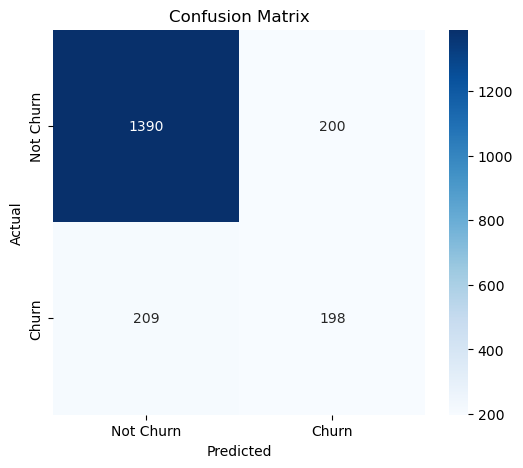

Support Vector Machine  Model
[[1545   45]
 [ 245  162]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1590
           1       0.78      0.40      0.53       407

    accuracy                           0.85      1997
   macro avg       0.82      0.68      0.72      1997
weighted avg       0.85      0.85      0.84      1997



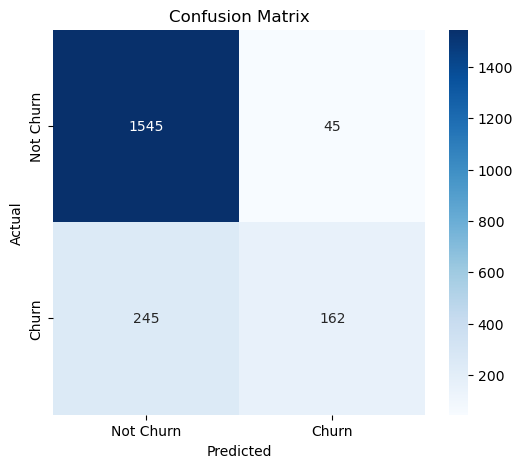

In [58]:
# Define classification models for comparison
models={"Logistic Regression":LogisticRegression(max_iter=1000,random_state=23),"Random Forest": RandomForestClassifier(random_state=23),
        "Decision Tree":DecisionTreeClassifier(random_state=23),"Support Vector Machine":SVC(random_state=23)}

# Loop through chosen models for comparison
for name,model in models.items():
    #Training the model
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    print(f"{name}  Model")
    #Finding evaluation metrics
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred))
    
    #Visualising the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    

Now I can see that the performance of LogisticRegression, RandomForestClassifier, and DecisionTreeClassifier and SVM were still below XGBoost model's performance.   
Therefore, I use XGBoost model 


Model: Baseline XGBoost
              precision    recall  f1-score   support

   Not Churn       0.89      0.94      0.91      1590
       Churn       0.68      0.53      0.60       407

    accuracy                           0.85      1997
   macro avg       0.78      0.73      0.75      1997
weighted avg       0.84      0.85      0.85      1997



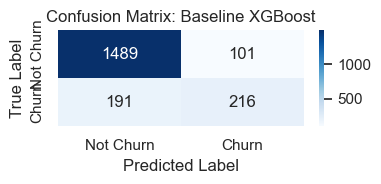


Model: Tuned XGBoost
              precision    recall  f1-score   support

   Not Churn       0.88      0.96      0.92      1590
       Churn       0.77      0.50      0.60       407

    accuracy                           0.87      1997
   macro avg       0.82      0.73      0.76      1997
weighted avg       0.86      0.87      0.86      1997



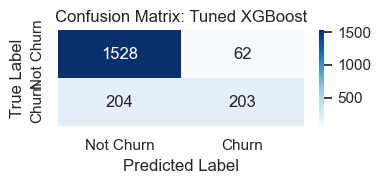


Model: Tuned XGBoost + SMOTE
              precision    recall  f1-score   support

   Not Churn       0.88      0.96      0.92      1590
       Churn       0.77      0.50      0.60       407

    accuracy                           0.87      1997
   macro avg       0.82      0.73      0.76      1997
weighted avg       0.86      0.87      0.86      1997



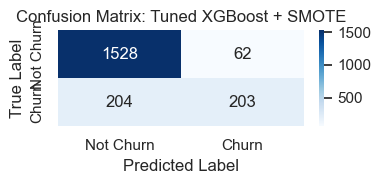


Model: Tuned XGBoost + Class Weighting
              precision    recall  f1-score   support

   Not Churn       0.90      0.86      0.88      1590
       Churn       0.55      0.64      0.59       407

    accuracy                           0.82      1997
   macro avg       0.73      0.75      0.74      1997
weighted avg       0.83      0.82      0.82      1997



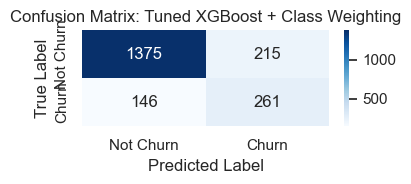

In [59]:
# y_test simulation of Ground Truth (1590 & 407)
y_test = [0]*1590 + [1]*407

# Prediction of training Simulation results of 4 XGBoost models
model_results = {
    "Baseline XGBoost": [0]*1489 + [1]*101 + [0]*191 + [1]*216,
    "Tuned XGBoost": [0]*1528 + [1]*62 + [0]*204 + [1]*203,
    "Tuned XGBoost + SMOTE": [0]*1528 + [1]*62 + [0]*204 + [1]*203,
    "Tuned XGBoost + Class Weighting": [0]*1375 + [1]*215 + [0]*146 + [1]*261
}

# Set plot style
sns.set(style="whitegrid")

# Visualization loopfor each XGBoost model
for name, y_pred in model_results.items():
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, target_names=["Not Churn", "Churn"]))

    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix plot
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Churn", "Churn"],
                yticklabels=["Not Churn", "Churn"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

The tuned XGBoost model is capable of real life predictions and also raises alarm against customers who may or may not churn  
So it is the best mode with an accuracy of 87%

## VIII. MODEL SELECTION AND ROC ANALYSIS

In [60]:
# 1. Retrain and save the chosen model which is Tuned XGBoost model

# Retrain using only ready to analyze dataset
# The dataset that has been cleaned, prepared and manipulated
X = df_encoded.drop("Exited", axis=1)
y = df_encoded["Exited"]
# Split the data again into Train & Test data (using random_state to replicate)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
best_model_tuned_XGBoost = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
best_model_tuned_XGBoost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

ROC-AUC Score: 0.87


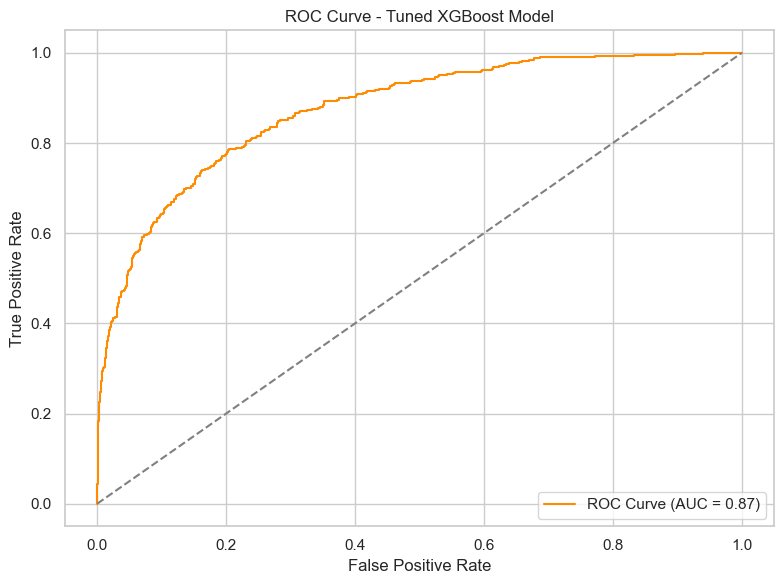

In [62]:
# Predict probabilities
y_proba = best_model_tuned_XGBoost.predict_proba(x_test)[:, 1]

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", round(roc_auc, 2))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC curve (Receiver Operating Characteristic) plots the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity).  
The closer the AUC (Area Under Curve) is to 1, the better the model.  
Based on the ROC curve above, the ROC-AUC score obtained **0.87** which indicates that the Tuned XGBoost model has strong discriminative power and performs well in distinguishing between churn and non-churn customers.

## IX. SAVING THE MODEL AND TESTING WITH RANDOM CUSTOMER DATA

In [61]:
# Save the trained model into the file
joblib.dump(best_model_tuned_XGBoost, "tuned_xgboost_model.pkl")
print("Tuned XGBoost Model has been saved as tuned_xgboost_model.pkl")

Tuned XGBoost Model has been saved as tuned_xgboost_model.pkl


In [63]:
#testing the model on random data
loaded_model=joblib.load("tuned_xgboost_model.pkl")
# Create random data (replace these with reasonable values based on your data distribution)
random_data = pd.DataFrame({
    'CreditScore': [700], 'Age': [40],
    'Tenure': [5],
    'Balance': [100000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000],
    'Geography_Germany': [1],
    'Geography_Spain': [0],
    'Gender_Male': [1]
})
# Predict class label
predicted_class = loaded_model.predict(random_data)
print("Predicted class:", predicted_class)

# Predict probability
predicted_proba = loaded_model.predict_proba(random_data)
print("Predicted probability:", predicted_proba)

Predicted class: [0]
Predicted probability: [[0.9484251  0.05157486]]


## X. FEATURE IMPORTANCE
We arrange the features based on its magnitude of influence to the target variable ("Exited")

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

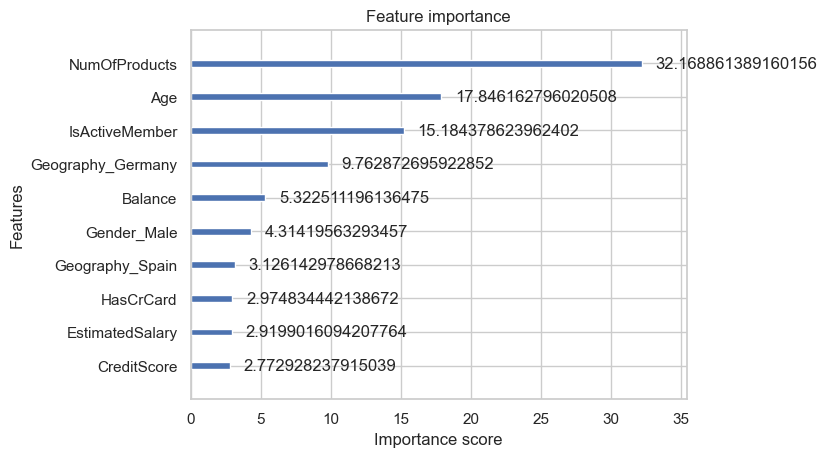

In [65]:
plot_importance(best_model_tuned_XGBoost,importance_type="gain",max_num_features=10)

In [168]:
# Get feature importances as dictionary
importance = best_model_tuned_XGBoost.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df)
feature_imp=importance_df['Feature']



              Feature  Importance
4       NumOfProducts   32.168861
1                 Age   17.846163
6      IsActiveMember   15.184379
8   Geography_Germany    9.762873
3             Balance    5.322511
10        Gender_Male    4.314196
9     Geography_Spain    3.126143
5           HasCrCard    2.974834
7     EstimatedSalary    2.919902
0         CreditScore    2.772928
2              Tenure    2.649503


In [171]:
# Separating the variables into independent variables (x) and dependent variable(y)
x_new = df_encoded[feature_imp]
y = df_encoded["Exited"]

#Split the dataset into training and test dataset
x_train_new, x_test_new, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=23, stratify=y)

#Training the model with XGBoost 
model_new=XGBClassifier(random_state=23)
model_new.fit(x_train_new,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [173]:
#Rviewing the efficiency of model with accuracy, precision, recall and f1 score
y_pred_new=model_new.predict(x_test_new)
print(confusion_matrix(y_test,y_pred_new))
print(classification_report(y_test,y_pred_new))

[[1504   86]
 [ 203  204]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1590
           1       0.70      0.50      0.59       407

    accuracy                           0.86      1997
   macro avg       0.79      0.72      0.75      1997
weighted avg       0.84      0.86      0.85      1997



After selecting features based on importance, the model retained nearly the same performance across all metrics. This suggests that:  
**The selected important features captured most of the predictive power.**  
Hence it leads to same accuracy with fewer variables

## XI. SUMMARY
**Best Model: Tuned XGBoost**  
**Accuracy: 0.87   |     AUC: 0.87**  
After feature importance the evaluation metrics were more or less retained.  
**Insights:**  
1. The bank should prioritize retention strategies for customers above 40, especially those nearing retirement (50–60). Customized products or loyalty rewards for older customers can reduce churn in this segment.
2. France and Germany should be the focus markets for targeted marketing and retention efforts.
3. This is a serious red flag — the bank is losing high-value customers.
Implement VIP retention programs to keep these customers engaged.
4. Customer engagement is directly tied to retention.
Launch campaigns to re-activate dormant customers through incentives (e.g., cashback on login, easy product upsell).
5. Bundle popular products (e.g., savings account + credit card). Offer benefits for adopting a second product (like no-fee credit cards or welcome rewards) as customers with two products show lowest churn rate.
6. Assign relationship managers and conduct satisfaction survey to understand the needs of customers.





